# Copernicus data

In [25]:
import copernicusmarine
from pprint import pprint
import xarray as xr
import matplotlib.pyplot as plt

## Download data

In [4]:
# Define output storage parameters
output_directory = './copernicus-data'

In [19]:
username = 'mjessen'
password = 'gM-Rzb4cS4Lwudk'
dataset_id = 'cmems_obs-ins_glo_phybgcwav_mynrt_na_irr'
part = 'latest'
params_cat = 'waves'
feature = 'TS'

start_date = '2024-01-01'
end_date = '2024-01-02'

north = 56
south = 50
west = -2
east = 10

In [9]:
file_list = 'files_to_download.txt'
file_list

'files_to_download.txt'

In [10]:
get_result = copernicusmarine.get(
    username = username,
    password = password,
    dataset_id=dataset_id,
    index_parts = True,
    file_list = file_list,
    output_directory=output_directory,
    no_directories=True)

INFO - 2025-07-03T09:15:02Z - Selected dataset version: "202311"
INFO - 2025-07-03T09:15:02Z - Selected dataset part: "latest"
WARNING - 2025-07-03T09:15:02Z - File s3://mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/DDW1A2_GEOxyz_D02_Meteo_Wind_Point_2023-11_dataReturn_Rev3_20240319.nc not found on the server. Skipping.
WARNING - 2025-07-03T09:15:02Z - No files found to download for direct download. Please check the files to download. We will try to list the files available for download and compare them with the requested files.
INFO - 2025-07-03T09:15:03Z - Listing files on remote server...
1it [00:00,  2.14it/s]


## Load data

In [22]:
path = './copernicus-data'
file = 'NO_TS_MO_WaddenEierlandseGat_202506.nc'

ds = xr.open_dataset(path + '/' + file)

In [23]:
ds.data_vars

Data variables:
    TIME_QC  (TIME) int8 4kB ...
    VTPK     (TIME, DEPTH) float32 35kB ...
    VTPK_QC  (TIME, DEPTH) float32 35kB ...
    VAVT     (TIME, DEPTH) float32 35kB ...
    VAVT_QC  (TIME, DEPTH) float32 35kB ...
    TEMP     (TIME, DEPTH) float32 35kB ...
    TEMP_QC  (TIME, DEPTH) float32 35kB ...
    VAVH     (TIME, DEPTH) float32 35kB ...
    VAVH_QC  (TIME, DEPTH) float32 35kB ...
    SWHT     (TIME, DEPTH) float32 35kB ...
    SWHT_QC  (TIME, DEPTH) float32 35kB ...
    VTZA     (TIME, DEPTH) float32 35kB ...
    VTZA_QC  (TIME, DEPTH) float32 35kB ...
    VMDR     (TIME, DEPTH) float32 35kB ...
    VMDR_QC  (TIME, DEPTH) float32 35kB ...
    VHM0     (TIME, DEPTH) float32 35kB ...
    VHM0_QC  (TIME, DEPTH) float32 35kB ...

### Plot wave height

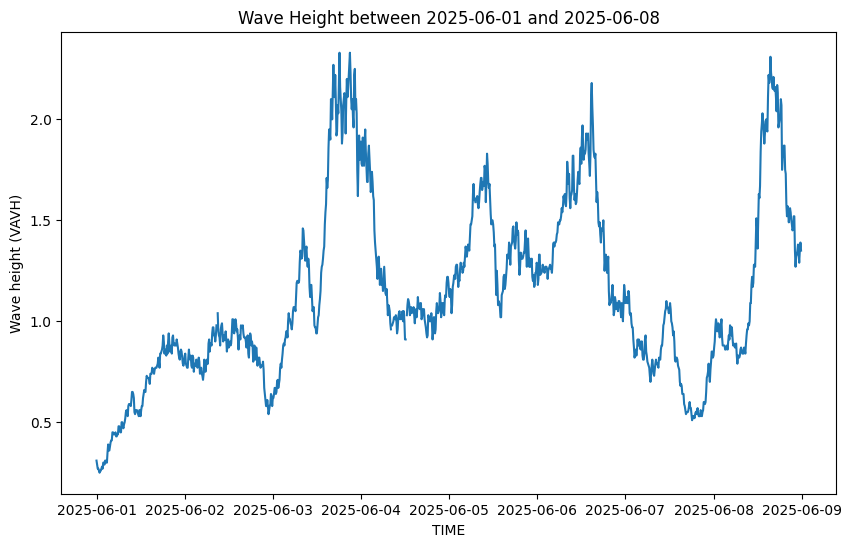

In [30]:
start_date = '2025-06-01'
end_date = '2025-06-08'


plt.figure(figsize=(10, 6))
# Select data for the specified time range
subset_data = ds.sel(TIME=slice(start_date, end_date))
VAVH = subset_data.VAVH
DEPH = subset_data.DEPH

plt.title('Wave Height between {} and {}'.format(start_date, end_date))
plt.xlabel('TIME')
plt.ylabel('Wave height (VAVH)')
plt.plot(subset_data.TIME,VAVH.sel(DEPTH=0))
plt.show()